In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf 


In [2]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [3]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer_1 = tf.keras.layers.Dense(30, activation='relu')
hidden_layer_2 = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

In [4]:
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden_1 = hidden_layer_1(normalized)
hidden_2 = hidden_layer_2(hidden_1)
concat = concat_layer([normalized, hidden_2])
output = output_layer(concat)

In [5]:
model = tf.keras.Model(inputs=[input_], outputs=[output])

In [6]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])

In [7]:
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 1.2797 - loss: 1.6924 - val_RootMeanSquaredError: 0.7368 - val_loss: 0.5428
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.7112 - loss: 0.5060 - val_RootMeanSquaredError: 0.6470 - val_loss: 0.4186
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6490 - loss: 0.4214 - val_RootMeanSquaredError: 0.6230 - val_loss: 0.3881
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6172 - loss: 0.3812 - val_RootMeanSquaredError: 0.6281 - val_loss: 0.3945
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.6212 - loss: 0.3861 - val_RootMeanSquaredError: 0.5962 - val_loss: 0.3554
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5973 - loss: 0.3568 - val_RootMeanSquaredError: 0.5933 - val_loss: 0.3520
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5924 - los

array([[2.5643573],
       [1.1139479],
       [1.7010636]], dtype=float32)

<Axes: >

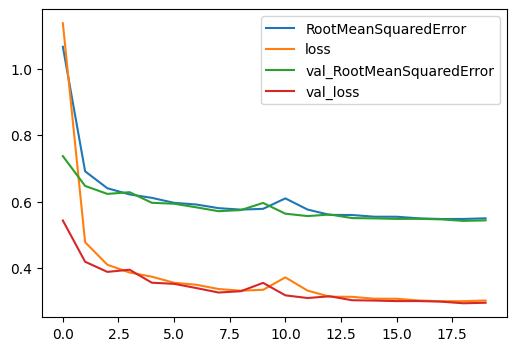

In [8]:
pd.DataFrame(history.history).plot(figsize=(6, 4))